In [1]:
import numpy as np        # nan ot etc                 
import pandas as pd       # use for load data in DataFrame or etc
import matplotlib.pyplot as plt # for ploting
import seaborn as sns   # for ploting
import re   # for regular expresion
import warnings  # for ignore the warnings
warnings.filterwarnings('ignore')
                                             # our target column is affected

# 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell','pus_cell_clumps', 'bacteria',
# 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium','potassium', 'haemoglobin', 'packed_cell_volume', 
# 'white_blood_cell_count', 'red_blood_cell_count','hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 
# 'peda_edema', 'aanemia', 'class'

In [2]:
df = pd.read_csv('ckd-dataset-v2.csv') # load the dataset in dataframe

In [3]:
df.shape # here there are 202 data/tuple/row  and 29 attribute/column 

(202, 29)

In [4]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [5]:
df.isnull().sum() # here we can see all attribute has one null value expect affected and age attribute 

bp (Diastolic)    1
bp limit          1
sg                1
al                1
class             1
rbc               1
su                1
pc                1
pcc               1
ba                1
bgr               1
bu                1
sod               1
sc                1
pot               1
hemo              1
pcv               1
rbcc              1
wbcc              1
htn               1
dm                1
cad               1
appet             1
pe                1
ane               1
grf               1
stage             1
affected          0
age               0
dtype: int64

In [6]:
pd.set_option('max_columns', None) # to show all coloum in dataframe
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


Handle missing value ( Drop / Fill)

In [7]:
df = df.drop(0)         # we have drop it because i could impact the data just for 1 data out of 202

In [8]:
 df  # here we can see that  row number 2 is deleted  sucessfully 

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,154 - 196,< 48.1,138 - 143,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,7360 - 9740,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
198,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,112 - 154,48.1 - 86.2,133 - 138,< 3.65,< 7.31,7.4 - 8.7,21.8 - 25.7,4.46 - 5.05,7360 - 9740,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
199,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,< 112,< 48.1,143 - 148,< 3.65,< 7.31,15.2 - 16.5,37.4 - 41.3,6.23 - 6.82,7360 - 9740,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
200,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,112 - 154,< 48.1,138 - 143,< 3.65,< 7.31,13.9 - 15.2,45.2 - 49.1,4.46 - 5.05,4980 - 7360,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


In [9]:
df.dropna(inplace = True) # drop NAN  => it would deleted data 2 

In [10]:
df.head() # Now 0 and 1 row/data/tuples has deleted 

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,37.4 - 41.3,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [11]:
df.isnull().sum() # here we can see that there is no null value in any attribute

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64

In [12]:
df.shape # after removing data 1 and 2 we have 200 reaming data/tuple/rows

(200, 29)

handle the ranges/alphabetic 

For class atrribute

In [13]:
# handle CKD and notCKD  of class attribute to make it 1 & 0 =>  make CKD to 1 and notCKD to 0
df['class'].value_counts()

ckd       128
notckd     72
Name: class, dtype: int64

In [14]:
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0}) # map the ckd or notckd in 1 and 0 form

In [15]:
df['class'].head()

2    1
3    1
4    1
5    1
6    1
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

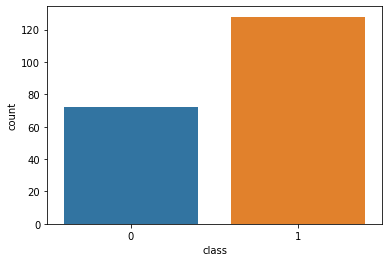

In [16]:
sns.countplot(df['class'])

 handle the structing problem in stage attribute ( Remove charater S in stage attribute)

In [17]:
df['stage'].value_counts() # In satage there are structing problem 

s1    54
s4    45
s5    35
s2    35
s3    31
Name: stage, dtype: int64

In [18]:
df['stage'] = df.stage.str.extract('([0-9]+)' , expand = False )   # remove s from stage attribute

In [19]:
df['stage'].value_counts() # so , removed the S in hole data

1    54
4    45
5    35
2    35
3    31
Name: stage, dtype: int64

<AxesSubplot:xlabel='stage', ylabel='count'>

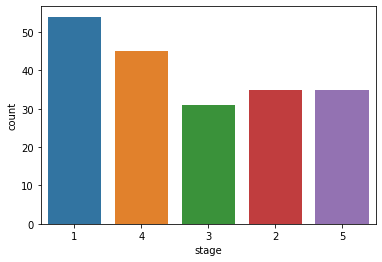

In [20]:
sns.countplot(df['stage'])


handle the ranges of grf attribute

In [21]:
df['grf'].value_counts()   # grf attribute has p so we find the index the remove/drop it because it's is useless

< 26.6175            68
26.6175 - 51.7832    38
51.7832 - 76.949     28
76.949 - 102.115     17
102.115 - 127.281    15
127.281 - 152.446    11
152.446 - 177.612     9
177.612 - 202.778     8
202.778 - 227.944     3
≥ 227.944             2
 p                    1
Name: grf, dtype: int64

In [22]:
df.index[df['grf']==' p '].tolist # find the location of p  index number id 181 so, we drop it 

<bound method IndexOpsMixin.tolist of Int64Index([181], dtype='int64')>

In [23]:
df['grf'].replace(' p ', np.nan , inplace=True) 

In [24]:
df['grf'].value_counts() 

< 26.6175            68
26.6175 - 51.7832    38
51.7832 - 76.949     28
76.949 - 102.115     17
102.115 - 127.281    15
127.281 - 152.446    11
152.446 - 177.612     9
177.612 - 202.778     8
202.778 - 227.944     3
≥ 227.944             2
Name: grf, dtype: int64

In [25]:
df['grf'].isnull().sum()  # here we can see that there is olny one null value which we maded (make p to NaN)

1

In [26]:
df['grf'].fillna(method = 'ffill' , inplace = True) # so fill nan to forward fill or we can drop it as well

In [27]:
df['grf'].isnull().sum()

0

In [28]:
df['grf'].value_counts()

< 26.6175            69
26.6175 - 51.7832    38
51.7832 - 76.949     28
76.949 - 102.115     17
102.115 - 127.281    15
127.281 - 152.446    11
152.446 - 177.612     9
177.612 - 202.778     8
202.778 - 227.944     3
≥ 227.944             2
Name: grf, dtype: int64

In [29]:
# n=df['grf'].unique()   # handle the ranges of grf  

# for i in range(0,len(n)):
#     df['grf'].replace(n[i],i,inplace=True)  

In [30]:
df['grf'] = df['grf'].replace(['< 26.6175'], '0' )  # hanlde the ranges of grf
df['grf'] = df['grf'].replace(['26.6175 - 51.7832'], '1' )
df['grf'] = df['grf'].replace(['51.7832 - 76.949'], '2' )
df['grf'] = df['grf'].replace(['76.949 - 102.115'], '3' )
df['grf'] = df['grf'].replace(['102.115 - 127.281'], '4' )
df['grf'] = df['grf'].replace(['127.281 - 152.446'], '5' )
df['grf'] = df['grf'].replace(['152.446 - 177.612'], '6' )
df['grf'] = df['grf'].replace(['177.612 - 202.778'], '7' )
df['grf'] = df['grf'].replace(['202.778 - 227.944'], '8' )
df['grf'] = df['grf'].replace(['≥ 227.944'], '9' )

In [31]:
df['grf'].value_counts()

0    69
1    38
2    28
3    17
4    15
5    11
6     9
7     8
8     3
9     2
Name: grf, dtype: int64

handle the age attribute

In [32]:
df['age'].value_counts()

59 - 66    48
66 - 74    34
51 - 59    33
43 - 51    31
27 - 35    14
35 - 43    12
≥ 74       10
20 - 27    10
< 12        4
12 - 20     4
Name: age, dtype: int64

In [33]:
df['age'] = df['age'].replace(['59 - 66'], '0' )
df['age'] = df['age'].replace(['66 - 74'], '1' )
df['age'] = df['age'].replace(['51 - 59'], '2' )
df['age'] = df['age'].replace(['43 - 51'], '3' )
df['age'] = df['age'].replace(['27 - 35'], '4' )
df['age'] = df['age'].replace(['35 - 43'], '5' )
df['age'] = df['age'].replace(['20 - 27'], '6' )
df['age'] = df['age'].replace(['≥ 74'], '7' )
df['age'] = df['age'].replace(['12 - 20'], '8' )
df['age'] = df['age'].replace(['< 12'], '9' )


In [34]:
# n=df['age'].unique()   # handle the ranges age

# for i in range(0,len(n)):
#     df['age'].replace(n[i],i,inplace=True) 

In [35]:
df['age'].value_counts()

0    48
1    34
2    33
3    31
4    14
5    12
7    10
6    10
9     4
8     4
Name: age, dtype: int64

handle the sugar(su) attribute

In [36]:
df['su'].value_counts()

< 0      170
2 - 2      9
3 - 4      8
1 - 2      6
4 - 4      6
≥ 4        1
Name: su, dtype: int64

In [37]:
# n=df['su'].unique()   # handle the ranges su

# for i in range(0,len(n)):
#     df['su'].replace(n[i],i,inplace=True)  

In [38]:
df['su'] = df['su'].replace(['< 0'], '0' )
df['su'] = df['su'].replace(['2 - 2'], '1' )
df['su'] = df['su'].replace(['3 - 4'], '2' )
df['su'] = df['su'].replace(['4 - 4'], '3' )
df['su'] = df['su'].replace(['1 - 2'], '4' )
df['su'] = df['su'].replace(['≥ 4'], '5' )

In [39]:
df['su'].value_counts()

0    170
1      9
2      8
4      6
3      6
5      1
Name: su, dtype: int64

handle the al attribute

In [40]:
df['al'].value_counts()

< 0      116
2 - 2     27
3 - 3     23
1 - 1     21
≥ 4       13
Name: al, dtype: int64

In [41]:
df['al'] = df['al'].replace(['< 0'], '0' )  # handle the ranges of al 
df['al'] = df['al'].replace(['2 - 2'], '1' )
df['al'] = df['al'].replace(['3 - 3'], '2' )
df['al'] = df['al'].replace(['1 - 1'], '3' )
df['al'] = df['al'].replace(['≥ 4'], '4' )

In [42]:
# n=df['al'].unique()   # handle the ranges  al

# for i in range(0,len(n)):
#     df['al'].replace(n[i],i,inplace=True)  

In [43]:
df['al'].value_counts()

0    116
1     27
2     23
3     21
4     13
Name: al, dtype: int64

handle the sg attribute

In [44]:
df['sg'].value_counts()

1.019 - 1.021    75
1.009 - 1.011    45
≥ 1.023          41
1.015 - 1.017    36
< 1.007           3
Name: sg, dtype: int64

In [45]:
# n=df['sg'].unique()   # handle the ranges  sg

# for i in range(0,len(n)):
#     df['sg'].replace(n[i],i,inplace=True)  

In [46]:
df['sg'] = df['sg'].replace(['1.019 - 1.021'], '0' ) # handle the ranges of sg
df['sg'] = df['sg'].replace(['1.009 - 1.011'], '0' ) 
df['sg'] = df['sg'].replace(['≥ 1.023'], '0' ) 
df['sg'] = df['sg'].replace(['1.015 - 1.017'], '0' )
df['sg'] = df['sg'].replace(['< 1.007'], '0' ) 


In [47]:
df['sg'].value_counts()

0    200
Name: sg, dtype: int64

handle the brg

In [48]:
df['bgr'].value_counts()

112 - 154    79
< 112        70
196 - 238    14
154 - 196    13
238 - 280    11
280 - 322     4
406 - 448     4
≥ 448         3
322 - 364     1
364 - 406     1
Name: bgr, dtype: int64

In [49]:
# n=df['bgr'].unique()   # handle the ranges  bgr

# for i in range(0,len(n)):
#     df['bgr'].replace(n[i],i,inplace=True)  

In [50]:
df['bgr'] = df['bgr'].replace(['112 - 154'],'0')  # handle the ranegs of brg
df['bgr'] = df['bgr'].replace(['< 112'],'1') 
df['bgr'] = df['bgr'].replace(['196 - 238'],'2') 
df['bgr'] = df['bgr'].replace(['154 - 196'],'3') 
df['bgr'] = df['bgr'].replace(['238 - 280'],'4') 
df['bgr'] = df['bgr'].replace(['280 - 322'],'5') 
df['bgr'] = df['bgr'].replace(['406 - 448'],'6') 
df['bgr'] = df['bgr'].replace(['≥ 448'],'7') 
df['bgr'] = df['bgr'].replace(['364 - 406'],'8') 
df['bgr'] = df['bgr'].replace(['322 - 364'],'9')

In [51]:
df['bgr'].value_counts()

0    79
1    70
2    14
3    13
4    11
5     4
6     4
7     3
9     1
8     1
Name: bgr, dtype: int64

handle bug attribute

In [52]:
df['bu'].value_counts()

< 48.1           108
48.1 - 86.2       53
86.2 - 124.3      16
124.3 - 162.4     11
200.5 - 238.6      5
162.4 - 200.5      5
238.6 - 276.7      1
≥ 352.9            1
Name: bu, dtype: int64

In [53]:
# n=df['bu'].unique()   # handle the ranges  bu

# for i in range(0,len(n)):
#     df['bu'].replace(n[i],i,inplace=True)  

In [54]:
df['bu'] = df['bu'].replace(['< 48.1'],'0') # handle the ranges of bu
df['bu'] = df['bu'].replace(['48.1 - 86.2'],'1')
df['bu'] = df['bu'].replace(['86.2 - 124.3'],'2')
df['bu'] = df['bu'].replace(['124.3 - 162.4'],'3')
df['bu'] = df['bu'].replace(['162.4 - 200.5'],'4')
df['bu'] = df['bu'].replace(['200.5 - 238.6'],'5')
df['bu'] = df['bu'].replace(['≥ 352.9'],'6')
df['bu'] = df['bu'].replace(['238.6 - 276.7'],'7')

In [55]:
df['bu'].value_counts()

0    108
1     53
2     16
3     11
5      5
4      5
7      1
6      1
Name: bu, dtype: int64

handle the sod

In [56]:
df['sod'].value_counts()

133 - 138    92
138 - 143    49
143 - 148    22
128 - 133    14
148 - 153     9
123 - 128     6
< 118         4
118 - 123     3
≥ 158         1
Name: sod, dtype: int64

In [57]:
# n=df['sod'].unique()   # handle the ranges  sod

# for i in range(0,len(n)):
#     df['sod'].replace(n[i],i,inplace=True)  

In [58]:
df['sod'] = df['sod'].replace(['133 - 138'],'0') # handle the ranges if sod
df['sod'] = df['sod'].replace(['138 - 143'],'1')
df['sod'] = df['sod'].replace(['143 - 148'],'2')
df['sod'] = df['sod'].replace(['128 - 133'],'3')
df['sod'] = df['sod'].replace(['148 - 153'],'4')
df['sod'] = df['sod'].replace(['123 - 128'],'5')
df['sod'] = df['sod'].replace(['< 118'],'6')
df['sod'] = df['sod'].replace(['118 - 123'],'7')
df['sod'] = df['sod'].replace(['≥ 158'],'8')


In [59]:
df['sod'].value_counts()

0    92
1    49
2    22
3    14
4     9
5     6
6     4
7     3
8     1
Name: sod, dtype: int64

handle the sc

In [60]:
df['sc'].value_counts()

< 3.65          159
3.65 - 6.8       22
6.8 - 9.95        9
13.1 - 16.25      4
9.95 - 13.1       4
16.25 - 19.4      1
≥ 28.85           1
Name: sc, dtype: int64

In [61]:
# n=df['sc'].unique()   # handle the ranges sc  

# for i in range(0,len(n)):
#     df['sc'].replace(n[i],i,inplace=True)  

In [62]:
df['sc'] = df['sc'].replace(['< 3.65'],'0')    # handle the ranges sc
df['sc'] = df['sc'].replace(['3.65 - 6.8'],'1')
df['sc'] = df['sc'].replace(['6.8 - 9.95'],'2')
df['sc'] = df['sc'].replace(['9.95 - 13.1'],'3')
df['sc'] = df['sc'].replace(['13.1 - 16.25'],'4')
df['sc'] = df['sc'].replace(['≥ 28.85'],'5')
df['sc'] = df['sc'].replace(['16.25 - 19.4'],'6')

In [63]:
df['sc'].value_counts()

0    159
1     22
2      9
4      4
3      4
5      1
6      1
Name: sc, dtype: int64

handle the pot

In [64]:
df['pot'].value_counts()

< 7.31           197
≥ 42.59            1
7.31 - 11.72       1
38.18 - 42.59      1
Name: pot, dtype: int64

In [65]:
# n=df['pot'].unique()   # handle the ranges  pot

# for i in range(0,len(n)):
#     df['pot'].replace(n[i],i,inplace=True)  

In [66]:
df['pot'] = df['pot'].replace(['< 7.31'],'0')  # handle the ranges  pot
df['pot'] = df['pot'].replace(['38.18 - 42.59'],'0')
df['pot'] = df['pot'].replace(['7.31 - 11.72'],'0')
df['pot'] = df['pot'].replace(['≥ 42.59'],'0')

In [67]:
df['pot'].value_counts()

0    200
Name: pot, dtype: int64

handle the hemo

In [68]:
df['hemo'].value_counts()

11.3 - 12.6    49
10 - 11.3      28
13.9 - 15.2    26
8.7 - 10       23
15.2 - 16.5    20
12.6 - 13.9    19
≥ 16.5         15
7.4 - 8.7      12
6.1 - 7.4       4
< 6.1           4
Name: hemo, dtype: int64

In [69]:
# n=df['hemo'].unique()   # handle the ranges  hemo

# for i in range(0,len(n)):
#     df['hemo'].replace(n[i],i,inplace=True)  

In [70]:
df['hemo'] = df['hemo'].replace(['11.3 - 12.6'],'0')  # handle the ranges  hemo
df['hemo'] = df['hemo'].replace(['10 - 11.3'],'1') 
df['hemo'] = df['hemo'].replace(['13.9 - 15.2'],'2') 
df['hemo'] = df['hemo'].replace(['8.7 - 10'],'3') 
df['hemo'] = df['hemo'].replace(['15.2 - 16.5'],'4') 
df['hemo'] = df['hemo'].replace(['12.6 - 13.9'],'5') 
df['hemo'] = df['hemo'].replace(['≥ 16.5'],'6') 
df['hemo'] = df['hemo'].replace(['7.4 - 8.7'],'7') 
df['hemo'] = df['hemo'].replace(['6.1 - 7.4'],'8') 
df['hemo'] = df['hemo'].replace(['< 6.1'],'9') 

In [71]:
df['hemo'].value_counts()

0    49
1    28
2    26
3    23
4    20
5    19
6    15
7    12
9     4
8     4
Name: hemo, dtype: int64

handle the pcv

In [72]:
df['pcv'].value_counts()

37.4 - 41.3    56
41.3 - 45.2    29
33.5 - 37.4    23
29.6 - 33.5    22
≥ 49.1         19
25.7 - 29.6    18
45.2 - 49.1    17
21.8 - 25.7    10
< 17.9          3
17.9 - 21.8     3
Name: pcv, dtype: int64

In [73]:
# n=df['pcv'].unique()   # handle the ranges pcv

# for i in range(0,len(n)):
#     df['pcv'].replace(n[i],i,inplace=True)  

In [74]:
df['pcv'] = df['pcv'].replace(['37.4 - 41.3'],'0') #handle the ranges of pcv
df['pcv'] = df['pcv'].replace(['41.3 - 45.2'],'1') 
df['pcv'] = df['pcv'].replace(['33.5 - 37.4'],'2') 
df['pcv'] = df['pcv'].replace(['29.6 - 33.5'],'3') 
df['pcv'] = df['pcv'].replace(['≥ 49.1'],'4') 
df['pcv'] = df['pcv'].replace(['25.7 - 29.6'],'5') 
df['pcv'] = df['pcv'].replace(['45.2 - 49.1'],'6') 
df['pcv'] = df['pcv'].replace(['21.8 - 25.7'],'7') 
df['pcv'] = df['pcv'].replace(['17.9 - 21.8'],'8') 
df['pcv'] = df['pcv'].replace(['< 17.9'],'9') 

In [75]:
df['pcv'].value_counts()

0    56
1    29
2    23
3    22
4    19
5    18
6    17
7    10
9     3
8     3
Name: pcv, dtype: int64

handle the rbcc

In [76]:
df['rbcc'].value_counts()

4.46 - 5.05    96
5.05 - 5.64    23
3.87 - 4.46    21
3.28 - 3.87    21
5.64 - 6.23    18
6.23 - 6.82     9
2.69 - 3.28     7
< 2.69          4
≥ 7.41          1
Name: rbcc, dtype: int64

In [77]:
# n=df['rbcc'].unique()   # handle the ranges rbcc

# for i in range(0,len(n)):
#     df['rbcc'].replace(n[i],i,inplace=True)  

In [78]:
df['rbcc'] = df['rbcc'].replace(['4.46 - 5.05'],'0') # handle the ranges of rbcc
df['rbcc'] = df['rbcc'].replace(['5.05 - 5.64'],'1')
df['rbcc'] = df['rbcc'].replace(['3.28 - 3.87'],'2')
df['rbcc'] = df['rbcc'].replace(['3.87 - 4.46'],'3')
df['rbcc'] = df['rbcc'].replace(['5.64 - 6.23'],'4')
df['rbcc'] = df['rbcc'].replace(['6.23 - 6.82'],'5')
df['rbcc'] = df['rbcc'].replace(['2.69 - 3.28'],'6')
df['rbcc'] = df['rbcc'].replace(['< 2.69'],'7')
df['rbcc'] = df['rbcc'].replace(['≥ 7.41'],'8')

In [79]:
df['rbcc'].value_counts()

0    96
1    23
3    21
2    21
4    18
5     9
6     7
7     4
8     1
Name: rbcc, dtype: int64

handle the wbcc

In [80]:
df['wbcc'].value_counts()

7360 - 9740      98
4980 - 7360      47
9740 - 12120     29
< 4980           10
14500 - 16880     6
12120 - 14500     6
16880 - 19260     2
≥ 24020           1
19260 - 21640     1
Name: wbcc, dtype: int64

In [81]:
# n=df['wbcc'].unique()   # handle the ranges  wbcc

# for i in range(0,len(n)):
#     df['wbcc'].replace(n[i],i,inplace=True)  

In [82]:
df['wbcc'] = df['wbcc'].replace(['7360 - 9740'],'0')           # hanle the ranegs of wbcC
df['wbcc'] = df['wbcc'].replace(['4980 - 7360'],'1')
df['wbcc'] = df['wbcc'].replace(['9740 - 12120'],'2')
df['wbcc'] = df['wbcc'].replace(['< 4980'],'3')
df['wbcc'] = df['wbcc'].replace(['12120 - 14500'],'4')
df['wbcc'] = df['wbcc'].replace(['14500 - 16880'],'5')
df['wbcc'] = df['wbcc'].replace(['16880 - 19260'],'6')
df['wbcc'] = df['wbcc'].replace(['≥ 24020'],'7')
df['wbcc'] = df['wbcc'].replace(['19260 - 21640'],'8')

In [83]:
df['wbcc'].value_counts()

0    98
1    47
2    29
3    10
5     6
4     6
6     2
7     1
8     1
Name: wbcc, dtype: int64

In [84]:
df.head(10)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,0,3,1,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,9,1,1,9
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,0,0,0,0,0,9,1,1,9
4,0,0,0,4,1,1,0,1,0,1,1,1,0,0,0,3,3,0,5,0,0,0,1,0,0,5,1,1,9
5,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,5,1,1,9
6,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,2,0,1,0,0,1,0,1,1,0,5,1,1,8
7,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,6,4,1,1,0,0,0,0,0,0,4,1,0,8
8,0,0,0,2,1,0,0,0,0,0,1,0,1,0,0,1,3,2,0,1,1,0,0,0,0,7,1,1,8
9,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,4,1,8
10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1,3,0,0,0,0,0,0,1,4,0,6
11,1,2,0,4,1,0,0,1,1,1,1,0,5,0,0,7,7,3,4,0,0,0,0,0,1,2,3,1,6


In [85]:
df['wbcc'].value_counts()

0    98
1    47
2    29
3    10
5     6
4     6
6     2
7     1
8     1
Name: wbcc, dtype: int64

# Limit the colums

In [86]:
df['bp (Diastolic)'].value_counts()  # this we will not apply the 

1    108
0     92
Name: bp (Diastolic), dtype: int64

handle the column of bo_limit

In [87]:
df['bp limit'].value_counts()  # this we will  apply the colum limit

0    95
1    59
2    46
Name: bp limit, dtype: int64

In [88]:
Counts = df['bp limit'].value_counts()
mask = df['bp limit'].isin(Counts[Counts<95].index)
df['bp limit'][mask] = 1

In [89]:
df['bp limit'].value_counts() 

1    105
0     95
Name: bp limit, dtype: int64

In [90]:
df['sg'].value_counts()   # check value count of sg

0    200
Name: sg, dtype: int64

handle the count limit of al

In [91]:
df['al'].value_counts()  # this we will not apply the 

0    116
1     27
2     23
3     21
4     13
Name: al, dtype: int64

In [92]:
Counts = df['al'].value_counts()
mask = df['al'].isin(Counts[Counts<116].index)
df['al'][mask] = 1

In [93]:
df['al'].value_counts()

0    116
1     84
Name: al, dtype: int64

In [94]:
df['class'].value_counts()   # check value count of class

1    128
0     72
Name: class, dtype: int64

handle the count limit of rbcc

In [95]:
df['rbcc'].value_counts()

0    96
1    23
3    21
2    21
4    18
5     9
6     7
7     4
8     1
Name: rbcc, dtype: int64

In [96]:
Counts = df['rbcc'].value_counts()
mask = df['rbcc'].isin(Counts[Counts<96].index)
df['rbcc'][mask] = 1

In [97]:
df.rbcc.value_counts()

1    104
0     96
Name: rbcc, dtype: int64

handle the su

In [98]:
df['su'].value_counts()   # check value count of su

0    170
1      9
2      8
4      6
3      6
5      1
Name: su, dtype: int64

In [99]:
Counts = df['su'].value_counts()
mask = df['su'].isin(Counts[Counts<170].index)
df['su'][mask] = 1

In [100]:
df['su'].value_counts()  

0    170
1     30
Name: su, dtype: int64

In [101]:
df['pc'].value_counts()   # check value count of pc

0    155
1     45
Name: pc, dtype: int64

In [102]:
df['pcc'].value_counts()   # check value count of pcc

0    173
1     27
Name: pcc, dtype: int64

In [103]:
df['ba'].value_counts()   # check value count of ba

0    189
1     11
Name: ba, dtype: int64

handle the limit of bgr

In [104]:
df['bgr'].value_counts()

0    79
1    70
2    14
3    13
4    11
5     4
6     4
7     3
9     1
8     1
Name: bgr, dtype: int64

In [105]:
Counts = df['bgr'].value_counts()
mask = df['bgr'].isin(Counts[Counts<70].index)
df['bgr'][mask] = 2

In [106]:
df['bgr'].value_counts()

0    79
1    70
2    51
Name: bgr, dtype: int64

handle the bu

In [107]:
df['bu'].value_counts()   # check value count of bu

0    108
1     53
2     16
3     11
5      5
4      5
7      1
6      1
Name: bu, dtype: int64

In [108]:
Counts = df['bu'].value_counts()
mask = df['bu'].isin(Counts[Counts<108].index)
df['bu'][mask] = 1

In [109]:
df['bu'].value_counts()   # check value count of bu

0    108
1     92
Name: bu, dtype: int64

handle the sod

In [110]:
df['sod'].value_counts()   # check value count of sod

0    92
1    49
2    22
3    14
4     9
5     6
6     4
7     3
8     1
Name: sod, dtype: int64

In [111]:
Counts = df['sod'].value_counts()
mask = df['sod'].isin(Counts[Counts<92].index)
df['sod'][mask] = 1

In [112]:
df['sod'].value_counts()

1    108
0     92
Name: sod, dtype: int64

handle the sc

In [113]:
df['sc'].value_counts()   # check value count of sc

0    159
1     22
2      9
4      4
3      4
5      1
6      1
Name: sc, dtype: int64

In [114]:
Counts = df['sc'].value_counts()
mask = df['sc'].isin(Counts[Counts<159].index)
df['sc'][mask] = 1

In [115]:
df['sc'].value_counts()

0    159
1     41
Name: sc, dtype: int64

In [116]:
df['pot'].value_counts()  # check value count of pot

0    200
Name: pot, dtype: int64

handle the limit of hemo

In [117]:
df['hemo'].value_counts()

0    49
1    28
2    26
3    23
4    20
5    19
6    15
7    12
9     4
8     4
Name: hemo, dtype: int64

In [118]:
Counts = df['hemo'].value_counts()
mask = df['hemo'].isin(Counts[Counts<49].index)
df['hemo'][mask] = 1

In [119]:
df['hemo'].value_counts()

1    151
0     49
Name: hemo, dtype: int64

handel the pcv

In [120]:
df['pcv'].value_counts()

0    56
1    29
2    23
3    22
4    19
5    18
6    17
7    10
9     3
8     3
Name: pcv, dtype: int64

In [121]:
Counts = df['pcv'].value_counts()
mask = df['pcv'].isin(Counts[Counts<56].index)
df['pcv'][mask] = 1

In [122]:
df['pcv'].value_counts()

1    144
0     56
Name: pcv, dtype: int64

In [123]:
df['rbcc'].value_counts() # check value count of rbcc

1    104
0     96
Name: rbcc, dtype: int64

handle the wbcc

In [124]:
df['wbcc'].value_counts()

0    98
1    47
2    29
3    10
5     6
4     6
6     2
7     1
8     1
Name: wbcc, dtype: int64

In [125]:
Counts = df['wbcc'].value_counts()
mask = df['wbcc'].isin(Counts[Counts<98].index)
df['wbcc'][mask] = 1

In [126]:
df['wbcc'].value_counts()

1    102
0     98
Name: wbcc, dtype: int64

In [127]:
df['htn'].value_counts()

0    122
1     78
Name: htn, dtype: int64

In [128]:
df['dm'].value_counts()

0    130
1     70
Name: dm, dtype: int64

In [129]:
df['cad'].value_counts()

0    178
1     22
Name: cad, dtype: int64

In [130]:
df['appet'].value_counts()

0    160
1     40
Name: appet, dtype: int64

In [131]:
df['pe'].value_counts()

0    165
1     35
Name: pe, dtype: int64

In [132]:
df['ane'].value_counts()

0    168
1     32
Name: ane, dtype: int64

hande the grf

In [133]:
df['grf'].value_counts()

0    69
1    38
2    28
3    17
4    15
5    11
6     9
7     8
8     3
9     2
Name: grf, dtype: int64

In [134]:
Counts = df['grf'].value_counts()
mask = df['grf'].isin(Counts[Counts<66].index)
df['grf'][mask] = 1

In [135]:
df['grf'].value_counts()

1    131
0     69
Name: grf, dtype: int64

handle the stage

In [136]:
df['stage'].value_counts()

1    54
4    45
5    35
2    35
3    31
Name: stage, dtype: int64

In [137]:
# Counts = df['stage'].value_counts()
# mask = df['stage'].isin(Counts[Counts<35].index)
# df['stage'][mask] = 0

In [138]:
df['stage'].value_counts()

1    54
4    45
5    35
2    35
3    31
Name: stage, dtype: int64

handle the age

In [139]:
df['age'].value_counts()

0    48
1    34
2    33
3    31
4    14
5    12
7    10
6    10
9     4
8     4
Name: age, dtype: int64

In [140]:
Counts = df['age'].value_counts()
mask = df['age'].isin(Counts[Counts<31].index)
df['age'][mask] = 4

In [141]:
df['age'].value_counts()

4    54
0    48
1    34
2    33
3    31
Name: age, dtype: int64

In [142]:
df

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,4
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,4
4,0,0,0,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,4
5,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,4
6,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,1,0,0,1,0,0,0,0,0,2,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,3,1,4
198,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,4,1,4
199,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,4
200,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,4


# One Hot encoding

In [143]:
# we will  apply one hot encoding on some attribute which are as follow ..
# bgr , brf  , stage and age

In [144]:
df['bgr'].value_counts()

0    79
1    70
2    51
Name: bgr, dtype: int64

In [145]:
df['grf'].value_counts()

1    131
0     69
Name: grf, dtype: int64

In [146]:
df['stage'].value_counts()

1    54
4    45
5    35
2    35
3    31
Name: stage, dtype: int64

In [147]:
df['age'].value_counts()

4    54
0    48
1    34
2    33
3    31
Name: age, dtype: int64

In [148]:
# colm = ['bgr', 'grf', 'stage', 'age']    # apply one hot encoding in bgr,grf,stage,age
# dfnew = pd.get_dummies(df, columns=colm)
# dfnew

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    object
 1   bp limit        200 non-null    object
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    int64 
 5   rbc             200 non-null    object
 6   su              200 non-null    object
 7   pc              200 non-null    object
 8   pcc             200 non-null    object
 9   ba              200 non-null    object
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

In [150]:
attribute = ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'affected', 'age']

for i in range(len(attribute)):
    df[attribute[i]] = df[attribute[i]].astype(int)
    
    # make the datatype to intger

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   bp (Diastolic)  200 non-null    int32
 1   bp limit        200 non-null    int32
 2   sg              200 non-null    int32
 3   al              200 non-null    int32
 4   class           200 non-null    int32
 5   rbc             200 non-null    int32
 6   su              200 non-null    int32
 7   pc              200 non-null    int32
 8   pcc             200 non-null    int32
 9   ba              200 non-null    int32
 10  bgr             200 non-null    int32
 11  bu              200 non-null    int32
 12  sod             200 non-null    int32
 13  sc              200 non-null    int32
 14  pot             200 non-null    int32
 15  hemo            200 non-null    int32
 16  pcv             200 non-null    int32
 17  rbcc            200 non-null    int32
 18  wbcc            200 non-null  

# apply heat map  of co relation  , apply logistic regresion and random forestaccuracy , presesion , recall , f1 score for both

In [152]:
print(df.corr()) # it show the co-realion in dataFame

                bp (Diastolic)  bp limit  sg        al     class  \
bp (Diastolic)        1.000000  0.970320 NaN  0.073987  0.101994   
bp limit              0.970320  1.000000 NaN  0.058831  0.100125   
sg                         NaN       NaN NaN       NaN       NaN   
al                    0.073987  0.058831 NaN  1.000000  0.638222   
class                 0.101994  0.100125 NaN  0.638222  1.000000   
rbc                   0.197173  0.208141 NaN  0.413529  0.283473   
su                    0.134859  0.147214 NaN  0.380173  0.315063   
pc                    0.088890  0.104901 NaN  0.633184  0.404112   
pcc                  -0.075742 -0.063728 NaN  0.464246  0.296292   
ba                    0.090649  0.097718 NaN  0.283501  0.180937   
bgr                   0.014152  0.008827 NaN  0.290399  0.340060   
bu                    0.066828  0.054241 NaN  0.413841  0.504116   
sod                   0.013688  0.046206 NaN -0.129274 -0.232412   
sc                    0.095923  0.086186 NaN  0.

In [153]:
df

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,4
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,4
4,0,0,0,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,4
5,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,4
6,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,1,0,0,1,0,0,0,0,0,2,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,3,1,4
198,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,4,1,4
199,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,4
200,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,4


<AxesSubplot:>

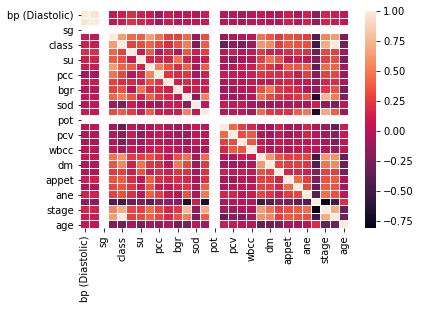

In [154]:
# plotting correlation of heatmap
sns.heatmap(df.corr(), cbar = True , linewidths = 0.01)     #cbar use fot color bar
  


In [155]:
end_column = df.pop('affected')

In [156]:
df

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,age
2,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,4
4,0,0,0,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,4
5,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,4
6,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,1,0,0,1,0,0,0,0,0,2,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,3,4
198,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,4,4
199,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,2,4
200,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,4


In [157]:
df.insert(28, 'affected', end_column)

In [158]:
df

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,age,affected
2,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,4,1
4,0,0,0,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,4,1
5,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,4,1
6,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,1,0,0,1,0,0,0,0,0,2,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,3,4,1
198,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,4,4,1
199,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,2,4,0
200,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,4,0


#     Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [160]:
X = df.drop(columns="affected")
y = df["affected"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# random_state use to stop diterminted to not apply changes in data

In [162]:
lrclf = LogisticRegression()
lrclf.fit(X_train, y_train)
y_pred = lrclf.predict(X_test) # Predictions
y_true = y_test # True values

In [163]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        36

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Text(69.0, 0.5, 'actual')

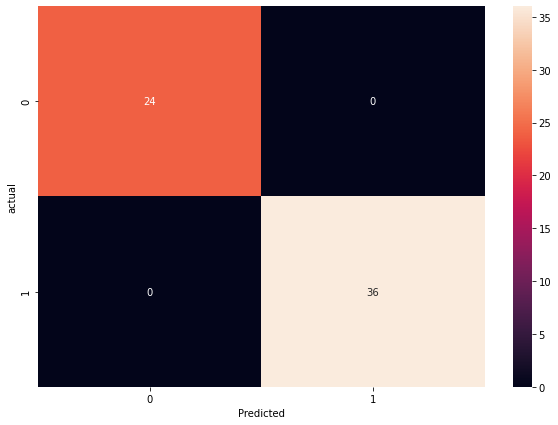

In [165]:
LR_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(LR_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('actual')

In [166]:
from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, lrclf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

Train accuracy: 1.0
Test accuracy: 1.0


# Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
RF_model = RandomForestClassifier(n_estimators = 100) 
#

In [169]:
RF_Classifier = RF_model.fit(X_train, y_train)

In [170]:
RF_Classifier

RandomForestClassifier()

In [171]:
RF_predictions = RF_Classifier.predict(X_test)

In [172]:
RF_predictions

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [173]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        36

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [174]:
print(confusion_matrix(y_test, RF_predictions))

[[24  0]
 [ 0 36]]


Text(69.0, 0.5, 'actual')

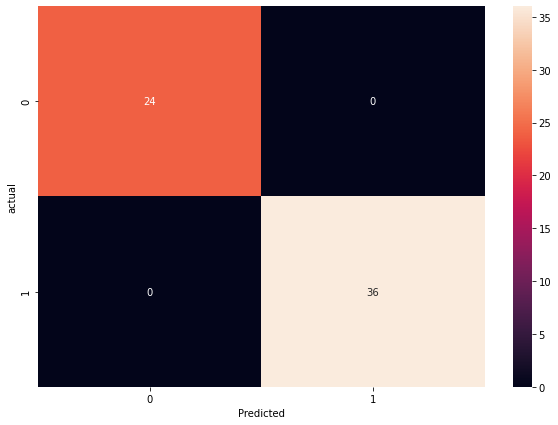

In [175]:
RF_cm = confusion_matrix(y_test, RF_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(RF_cm, annot=True)     #[TN  FP]
plt.xlabel('Predicted')            #[FN  TP]
plt.ylabel('actual')               

In [176]:
print("Accuracy of data:", accuracy_score(y_test, RF_predictions))

Accuracy of data: 1.0
